In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("My Uber Drives - 2016.csv")

In [3]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
 df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [6]:
df.columns=df.columns.str.replace("*","")

In [7]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [8]:
df.drop(index=1155, inplace=True)

In [9]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [10]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [11]:
(df["PURPOSE"].isnull().sum()/(
    len(df["PURPOSE"])-1))*100

43.500866551126514

In [12]:
df["PURPOSE"].fillna(method='ffill',inplace=True)

In [13]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [14]:
df.describe()

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [15]:
df["START_DATE"]=pd.to_datetime(df["START_DATE"],errors="coerce")

In [16]:
df["END_DATE"]=pd.to_datetime(df["END_DATE"],errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [18]:
# frequency of all start locations
start=df["START"].value_counts()

In [19]:
end=df["STOP"].value_counts()

In [20]:
start[start>10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
Name: START, dtype: int64

In [21]:
end

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP, Length: 188, dtype: int64

In [22]:
# miles columns , purpose , duration of trip
minutes=df.END_DATE-df.START_DATE

In [23]:
minutes

0      0 days 00:06:00
1      0 days 00:12:00
2      0 days 00:13:00
3      0 days 00:14:00
4      0 days 01:07:00
             ...      
1150   0 days 00:07:00
1151   0 days 00:18:00
1152   0 days 00:35:00
1153   0 days 00:18:00
1154   0 days 01:43:00
Length: 1155, dtype: timedelta64[ns]

In [24]:
minutes.describe()

count                         1155
mean     0 days 00:23:14.597402597
std      0 days 00:27:19.096606181
min                0 days 00:00:00
25%                0 days 00:10:00
50%                0 days 00:16:00
75%                0 days 00:27:30
max                0 days 05:36:00
dtype: object

In [25]:
df["PURPOSE"].describe()

count        1155
unique         10
top       Meeting
freq          308
Name: PURPOSE, dtype: object

In [26]:
df["MILES"].describe()

count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES, dtype: float64

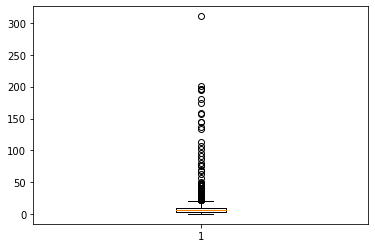

In [27]:
plt.boxplot(df["MILES"])
plt.show()

In [28]:
miles=df.MILES.value_counts()

In [29]:
miles[miles>10]

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
2.5     19
1.7     18
1.8     18
2.2     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
5.5     14
1.4     14
1.6     13
7.9     13
2.7     12
2.3     12
6.2     12
5.7     12
2.9     12
1.5     12
6.0     11
4.9     11
7.7     11
5.1     11
1.0     11
Name: MILES, dtype: int64

<AxesSubplot:>

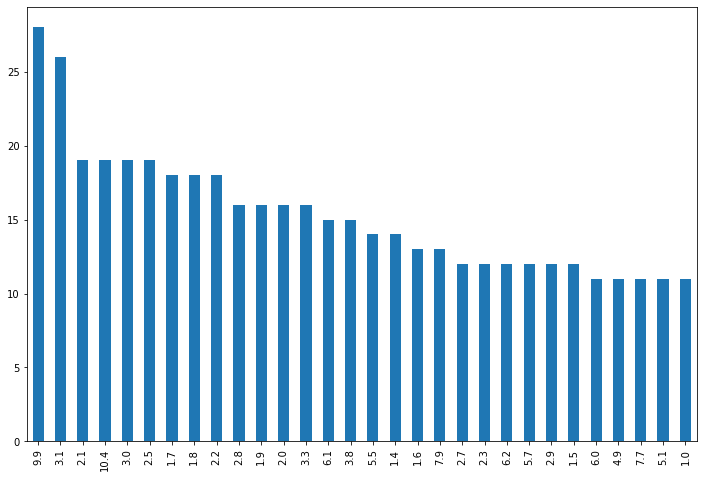

In [30]:
plt.figure(figsize=(12,8))
miles[miles>10].plot(kind='bar')

In [31]:
df["PURPOSE"].value_counts()

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [32]:
df.groupby(['PURPOSE'])['MILES'].mean()

PURPOSE
Airport/Travel      14.953704
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      16.065806
Errand/Supplies      5.928902
Meal/Entertain       5.773878
Meeting             12.652597
Moving               4.550000
Temporary Site      11.016327
Name: MILES, dtype: float64

In [33]:
df.groupby(['PURPOSE'])['MILES'].max()

PURPOSE
Airport/Travel     156.9
Between Offices     39.2
Charity ($)         15.1
Commute            180.2
Customer Visit     310.3
Errand/Supplies    195.3
Meal/Entertain      36.5
Meeting            201.0
Moving               6.1
Temporary Site     195.6
Name: MILES, dtype: float64

In [34]:
df.groupby(["PURPOSE"]).agg({"MILES":['mean',max,min]})

MILES              
                       mean    max    min
PURPOSE                                  
Airport/Travel    14.953704  156.9    0.9
Between Offices   10.944444   39.2    1.9
Charity ($)       15.100000   15.1   15.1
Commute          180.200000  180.2  180.2
Customer Visit    16.065806  310.3    0.6
Errand/Supplies    5.928902  195.3    0.5
Meal/Entertain     5.773878   36.5    0.6
Meeting           12.652597  201.0    0.7
Moving             4.550000    6.1    3.3
Temporary Site    11.016327  195.6    0.7

<function matplotlib.pyplot.show(close=None, block=None)>

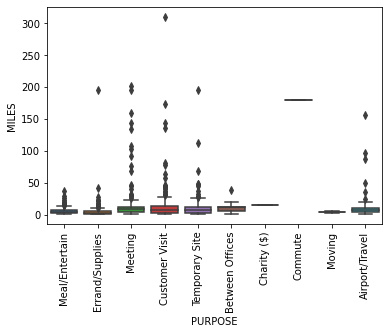

In [35]:
sms.boxplot(data=df,x=df.PURPOSE,y=df.MILES)
plt.xticks(rotation=90)
plt.show

<AxesSubplot:xlabel='PURPOSE', ylabel='count'>

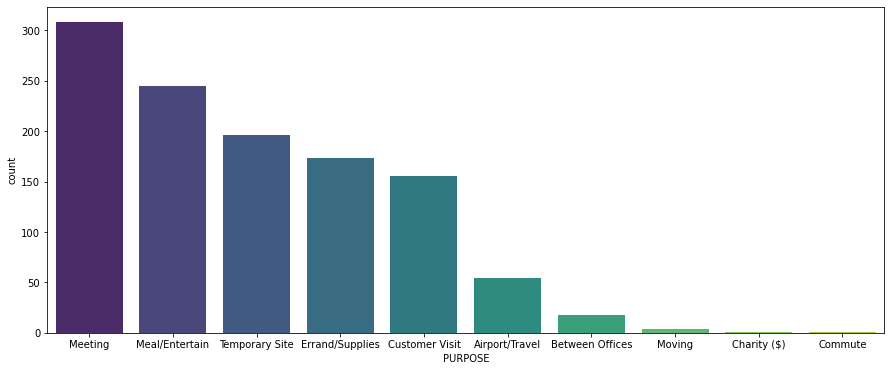

In [36]:
plt.figure(figsize=(15,6))
sms.countplot(df['PURPOSE'],order=df['PURPOSE'].value_counts().index,palette='viridis')
# plt.xticks(rotation=60)

In [37]:
df['PURPOSE'].value_counts().index

Index(['Meeting', 'Meal/Entertain', 'Temporary Site', 'Errand/Supplies',
       'Customer Visit', 'Airport/Travel', 'Between Offices', 'Moving',
       'Charity ($)', 'Commute'],
      dtype='object')

In [38]:
df["MINUTES"]=minutes

In [39]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [40]:
df["MINUTES"]=df['MINUTES'].dt.total_seconds()/60
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
 7   MINUTES     1155 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 72.3+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

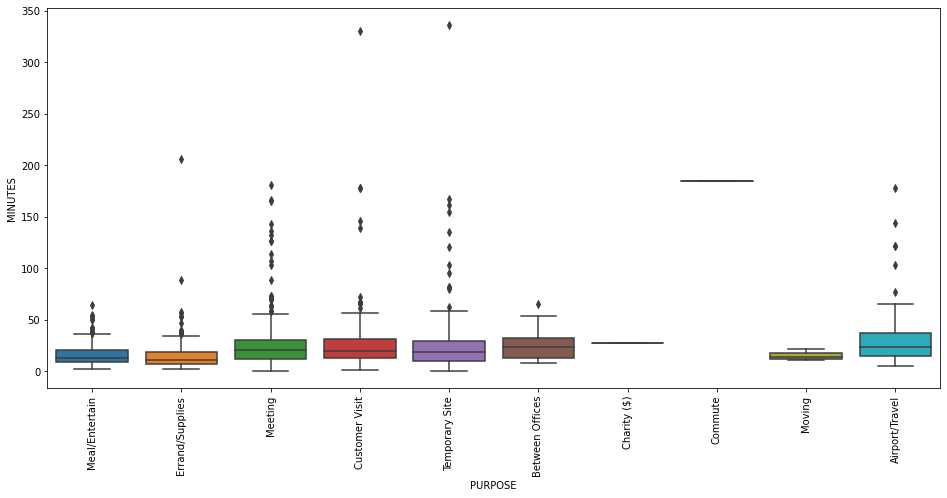

In [42]:
plt.figure(figsize=(16,7))
sms.boxplot(data=df,x=df.PURPOSE,y=df.MINUTES)
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

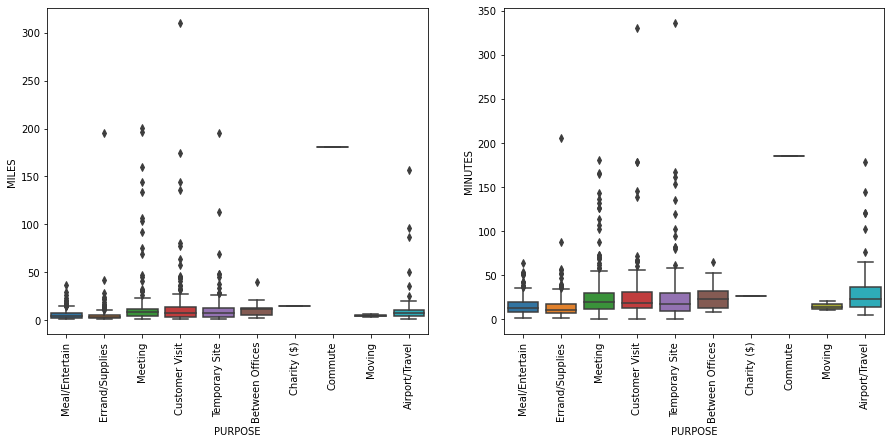

In [43]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sms.boxplot(data=df,x=df.PURPOSE,y=df.MILES)
plt.xticks(rotation=90)

# plt.figure(figsize=(16,7))
plt.subplot(1,2,2)
sms.boxplot(data=df,x=df.PURPOSE,y=df.MINUTES)
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

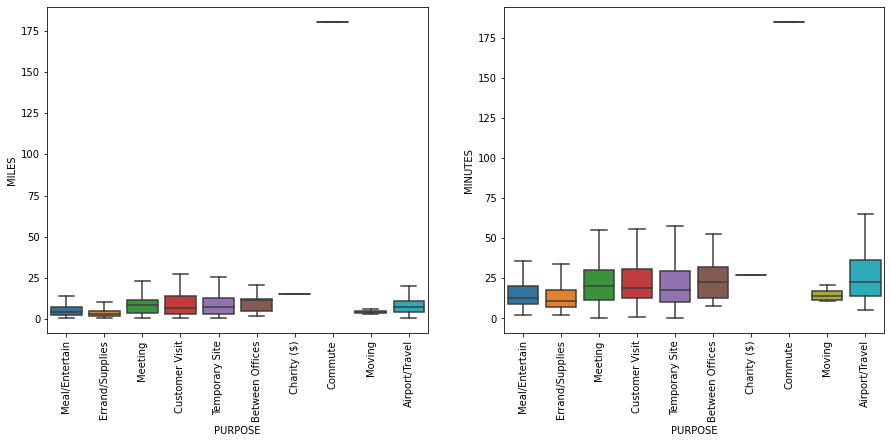

In [44]:
 plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sms.boxplot(data=df,x=df.PURPOSE,y=df.MILES, showfliers=False)
plt.xticks(rotation=90)

# plt.figure(figsize=(16,7))
plt.subplot(1,2,2)
sms.boxplot(data=df,x=df.PURPOSE,y=df.MINUTES, showfliers=False)
plt.xticks(rotation=90)
plt.show

In [45]:
# round trip

df['round']=df['START']==df['STOP']

In [46]:
# month columns

df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'MINUTES', 'round'],
      dtype='object')

In [47]:
df['month']=pd.DatetimeIndex(df["START_DATE"]).month

In [48]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,round,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,True,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,True,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,True,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,True,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,False,1
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,True,12
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,False,12
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,True,12
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,False,12


In [49]:
dic={1:'jan' , 2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}

In [50]:
df['month']=df['month'].map(dic)

In [51]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,round,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,True,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,True,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,True,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,True,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,False,jan
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,True,dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,False,dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,True,dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,False,dec


In [52]:
df.groupby(df["month"])['round'].max()

month
apr      True
aug      True
dec      True
feb      True
jan      True
july     True
june     True
mar      True
may     False
nov      True
oct      True
sep      True
Name: round, dtype: bool

In [53]:
month=df['month'].value_counts()

In [54]:
df.groupby(["month"]).agg({"round":[max]})

,round
,max
month,
apr,True
aug,True
dec,True
feb,True
jan,True
july,True
june,True
mar,True


In [55]:
def round(x):
    if x["START"]==x["STOP"]:
        return 'yes'
    else:
        return 'no'

In [56]:
df['ROUND_TRIP']=df.apply(round,axis=1)

<AxesSubplot:xlabel='ROUND_TRIP', ylabel='count'>

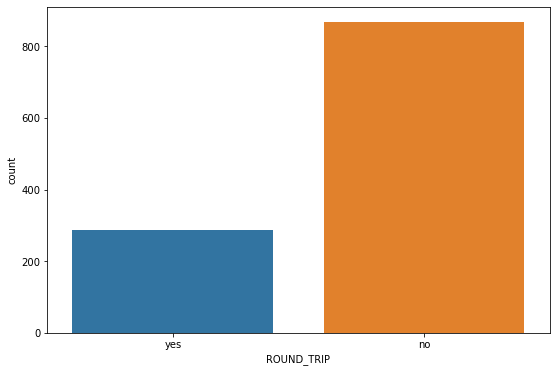

In [57]:
plt.figure(figsize=(9,6))
sms.countplot(df["ROUND_TRIP"])


<AxesSubplot:xlabel='round', ylabel='count'>

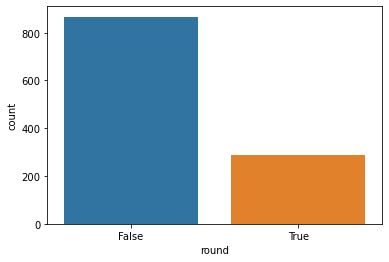

In [58]:
sms.countplot(df["round"])

In [59]:
df['round'].value_counts()

False    867
True     288
Name: round, dtype: int64

In [60]:
df["ROUND_TRIP"].value_counts()

no     867
yes    288
Name: ROUND_TRIP, dtype: int64

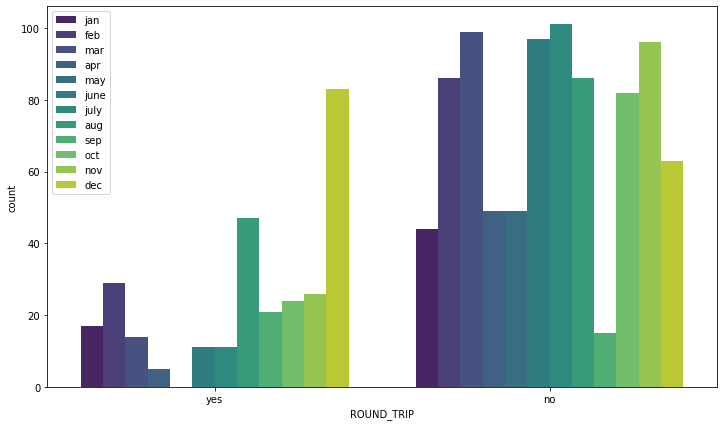

In [61]:
plt.figure(figsize=(12,7))
sms.countplot(df["ROUND_TRIP"],hue=df["month"], palette='viridis')
plt.legend()

In [62]:
df.groupby(['month',"ROUND_TRIP"])["ROUND_TRIP"].count()

month  ROUND_TRIP
apr    no             49
       yes             5
aug    no             86
       yes            47
dec    no             63
       yes            83
feb    no             86
       yes            29
jan    no             44
       yes            17
july   no            101
       yes            11
june   no             97
       yes            11
mar    no             99
       yes            14
may    no             49
nov    no             96
       yes            26
oct    no             82
       yes            24
sep    no             15
       yes            21
Name: ROUND_TRIP, dtype: int64

In [63]:
sort= df.groupby(['month','round']).agg({"round":'count'})

In [64]:
sort.columns=["countdata"]

In [65]:
sort=sort.reset_index()

In [66]:
sort

,month,round,countdata
0,apr,False,49
1,apr,True,5
2,aug,False,86
3,aug,True,47
4,dec,False,63
5,dec,True,83
6,feb,False,86
7,feb,True,29
8,jan,False,44
9,jan,True,17


In [67]:
sort[sort['round']==True].sort_values(by=['month','countdata'],ascending=True)

,month,round,countdata
1,apr,True,5
3,aug,True,47
5,dec,True,83
7,feb,True,29
9,jan,True,17
11,july,True,11
13,june,True,11
15,mar,True,14
18,nov,True,26
20,oct,True,24


In [68]:
pd.set_option('display.max_rows',None)

In [69]:

df[df['month']=='dec'].groupby(["PURPOSE", 'month', 'ROUND_TRIP'])['month'].count()

PURPOSE          month  ROUND_TRIP
Airport/Travel   dec    yes            2
Between Offices  dec    yes            1
Customer Visit   dec    no            16
                        yes           10
Errand/Supplies  dec    no            11
                        yes           36
Meal/Entertain   dec    no            18
                        yes           13
Meeting          dec    no            12
                        yes           18
Temporary Site   dec    no             6
                        yes            3
Name: month, dtype: int64

<AxesSubplot:xlabel='MINUTES', ylabel='MILES'>

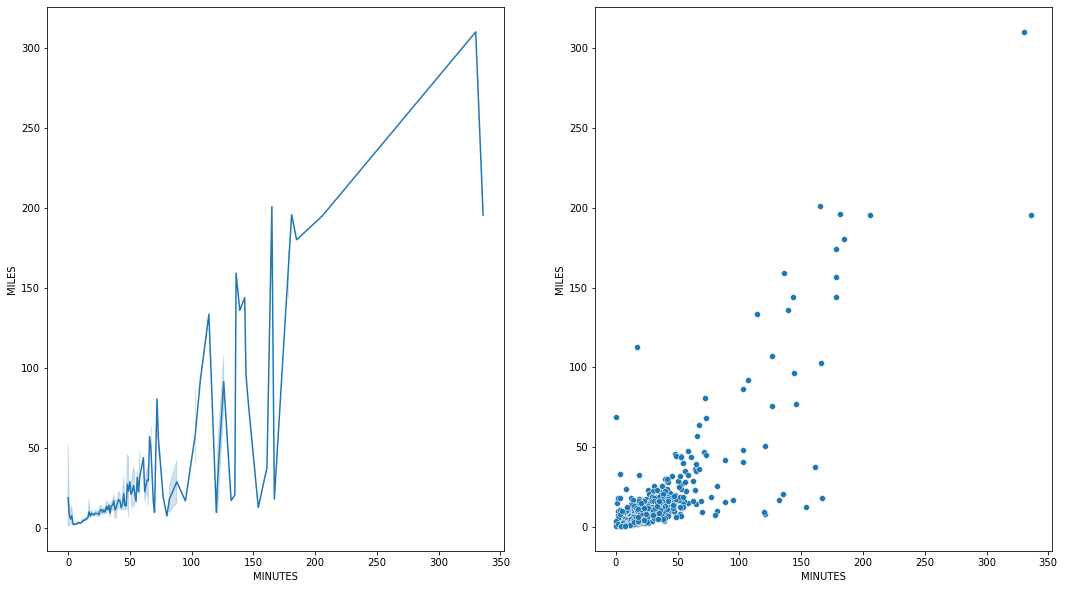

In [70]:
# line plot / scatter plot x and y axis 
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sms.lineplot( y=df['MILES'] , x=df['MINUTES'])
plt.subplot(122)
sms.scatterplot(x=df["MINUTES"], y=df["MILES"])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

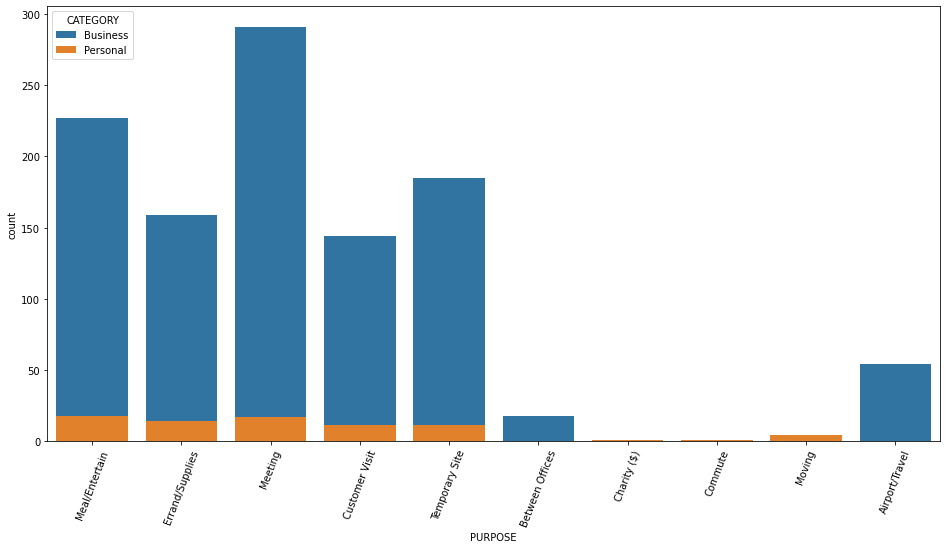

In [82]:
plt.figure(figsize=(16,8))
sms.countplot(data=df,hue='CATEGORY', x='PURPOSE', dodge=False)
plt.xticks(rotation=69)

In [88]:
a=df.groupby(['CATEGORY', "START"]).agg({"START":"count"})

In [89]:
a.columns=["countdata"]

In [90]:
a.reset_index()

,CATEGORY,START,countdata
0,Business,Agnew,4
1,Business,Almond,1
2,Business,Apex,17
3,Business,Arabi,1
4,Business,Arlington,1
5,Business,Arlington Park at Amberly,1
6,Business,Asheville,2
7,Business,Austin,1
8,Business,Banner Elk,1
9,Business,Bellevue,1


In [95]:
a.reset_index().sort_values(by=["CATEGORY",'countdata'],ascending=False)

,CATEGORY,START,countdata
201,Personal,Whitebridge,9
169,Personal,Banner Elk,7
183,Personal,Kissimmee,6
187,Personal,Morrisville,6
180,Personal,Islamabad,5
190,Personal,Orlando,4
191,Personal,Preston,4
171,Personal,Cary,3
170,Personal,Boone,2
173,Personal,Couples Glen,2


In [96]:
df.groupby(['CATEGORY'])['MILES'].mean()

CATEGORY
Business    10.655844
Personal     9.320779
Name: MILES, dtype: float64